The following are the libraries used in this brain tumor detection model. The command 'pip' is used for the installation of some libraries.

In [2]:
from zipfile import ZipFile
import matplotlib.pyplot as plt
from PIL import Image
from colorama import Fore
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,AveragePooling2D,MaxPool2D
from tensorflow.keras.layers import Dense,Dropout,Flatten, BatchNormalization
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import os
import cv2
import glob 

The "BrainTumor-DataSet" file is unzipped. Dictionary comprehension is implemented to abstract and join files from the given directory. The following commands are used: os.listdir and os.path.join. Then, the amount of data contained in those files is listed (len command). 

In [ ]:
zip_folder = ZipFile("BrainTumor-DataSet.zip", mode = 'r')
zip_folder.extractall()

files = ["Training", "Testing"]
Directory1, images_dictionary1 = 'Brain-Tumor-Classification-DataSet-master', {}
images_dictionary1 = {directory1 : len(os.listdir(os.path.join(Directory1 , directory1))) for directory1 in os.listdir(Directory1)}
print(Fore.BLUE + "Content in main file: ")
print("\t" + Fore.BLACK + str(images_dictionary1.items()))


for path in files:
  Directory2, images_dictionary2 = Directory1 + "/" + path, {}
  images_dictionary2 = {directory2 : len(os.listdir(os.path.join(Directory2, directory2))) for directory2 in os.listdir(Directory2)}
  print(Fore.BLUE + "Content in", path, "file:")
  print("\t" + Fore.BLACK + str(images_dictionary2.items()))


Content in main file: 
	dict_items([('Testing', 4), ('Training', 4)])
Content in Training file:
	dict_items([('no_tumor', 395), ('glioma_tumor', 826), ('meningioma_tumor', 822), ('pituitary_tumor', 827)])
Content in Testing file:
	dict_items([('no_tumor', 105), ('glioma_tumor', 100), ('meningioma_tumor', 115), ('pituitary_tumor', 74)])


The images are displayed for each tumor. Later, they are are resized. 

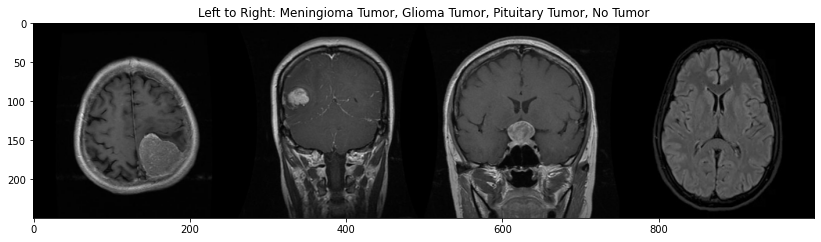

In [3]:

tumor1 = Image.open('meningioma.jpg')
tumor2 = Image.open('glioma.jpg')
tumor3 = Image.open('pituitary.jpg')
no_t = Image.open('none.jpg')

meningioma = tumor1.resize((255, 255))
glioma = tumor2.resize((255, 255))
pituitary = tumor3.resize((255, 255))
no_tumor = no_t.resize((255, 255))

image = Image.new("RGB", (1000, 250), "white")
plt.figure(figsize = (14, 14))

image.paste(meningioma, (0, 0))
image.paste(glioma, (250, 0))
image.paste(pituitary, (500, 0))
image.paste(no_tumor, (750, 0))

plt.title('Left to Right: Meningioma Tumor, Glioma Tumor, Pituitary Tumor, No Tumor')
plt.imshow(image)
  

The data is being pre-processed (preparing data to train model). The images contained in each tumor (training) folder are resized. Later, categorical encoding (one-hot-encoder) is performed. The tumor types are taken, and they are converted into binary. This can be seen in the output.

In [ ]:
brain_tumors = ["meningioma_tumor", "glioma_tumor", "pituitary_tumor", "no_tumor"]
brain_tumor_dict = {"meningioma_tumor" : 0, "glioma_tumor" : 1, "pituitary_tumor" : 2, "no_tumor" : 3}
print(brain_tumor_dict)
directory3 = "Brain-Tumor-Classification-DataSet-master/Training/" 

tumors_converted = [0, 1, 2, 3]
one_hot_encoder = preprocessing.OneHotEncoder()
one_hot_encoder.fit([[tumors_converted[0]], [tumors_converted[1]], [tumors_converted[2]], [tumors_converted[3]]])

x_array, y_array=[], []
count = 0
for tumor in brain_tumors:
  for image in glob.glob(directory3 + tumor + "/*.jpg"):
    picture = cv2.imread(image)
    picture = cv2.resize(picture, (255, 255))
    x_array.append(picture)
    transform = one_hot_encoder.transform([[tumors_converted[count]]])
    y_array.append(transform.toarray())                         
  count += 1 
  
x_array = np.asarray(x_array)
y_array = np.asarray(y_array)
y_array = y_array.reshape(2870, 4)
print(y_array)


{'meningioma_tumor': 0, 'glioma_tumor': 1, 'pituitary_tumor': 2, 'no_tumor': 3}
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


The data is split such that 80 percent is used for training while the rest is used for testing. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_array, y_array, test_size = 0.2, random_state = 100, shuffle = True)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2296, 255, 255, 3) (574, 255, 255, 3) (2296, 4) (574, 4)


The convolutional neural network is created. The Conv2D layers are created with different filters (16,32,64). A non-linear activation function (relu) is applied. MaxPooling is performed. It reduces the computations and takes the maximum of the data. The Dropout layer prevents the model from overfitting. Batch Normalization provides stability to the network and speeds up the process. The flattening layer converts the data into a one dimensional array. The adam optimizer is used to adjust the learning rate and minimize the losses. Also, categorical crossentropy is used for classification. It gives the probability that an image belongs to a specific category.

In [ ]:
ml_model = Sequential()
activation, input_shape = 'relu', (255, 255, 3)
ml_model.add(Conv2D(16, kernel_size = (3, 3),activation = activation, input_shape = input_shape))
ml_model.add(BatchNormalization())
ml_model.add(Conv2D(32, kernel_size = (3, 3), activation = activation, input_shape = input_shape))
ml_model.add(Conv2D(64, kernel_size = (3, 3), activation = activation, input_shape = input_shape))
ml_model.add(Dropout(0.60))
ml_model.add(MaxPool2D(pool_size = (3, 3)))
ml_model.add(Dropout(0.45))
ml_model.add(Flatten())
ml_model.add(Dense(128, activation = activation))
ml_model.add(Dropout(0.60))
ml_model.add(Dense(4, activation = 'softmax'))

ml_model.summary()


epochs=10
ml_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = ml_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 253, 253, 16)      448       
_________________________________________________________________
batch_normalization_11 (Batc (None, 253, 253, 16)      64        
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 251, 251, 32)      4640      
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 249, 249, 64)      18496     
_________________________________________________________________
dropout_39 (Dropout)         (None, 249, 249, 64)      0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 83, 83, 64)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 83, 83, 64)      

This section plots the training and validation loss of the convolutional neural network. It shows that the loss is decreasing as the epochs increase. It explains that the model is learning well. Matplotlib is used to visualize the data.

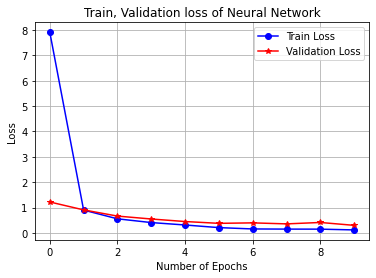

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss, marker = "o", color = "blue", label = 'Train Loss') 
plt.plot(val_loss, marker = "*", color = "red", label = "Validation Loss")
plt.legend(loc = 'best')
plt.title('Train, Validation loss of Neural Network')
plt.xlabel('Number of Epochs'), plt.ylabel('Loss')
plt.grid()
plt.show()


This section plots the training and validation accuracy of the convolutional neural network. As the number of epochs increase, the accuracy increases too. Matplotlib is used to visualize the data.

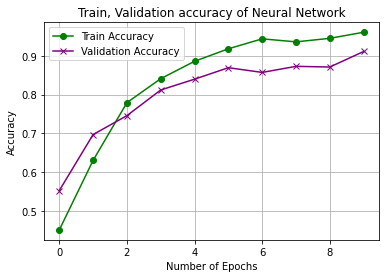

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(accuracy, marker = "o", color = "green", label = "Train Accuracy") 
plt.plot(val_accuracy, marker = "x", color = "purple", label = "Validation Accuracy")
plt.legend(loc = 'best')
plt.title('Train, Validation accuracy of Neural Network')
plt.xlabel('Number of Epochs'), plt.ylabel('Accuracy')
plt.grid()
plt.show()

The classification report is generated. Precision explains the percentage of predictions accurately predicted by the model. Recall explains the percentage of positive cases accurately predicted. F1 score is calculated taking into consideration both the precision and recall score.

In [ ]:
output_prediction = ml_model.predict(x_test)
output_prediction, output_test = np.argmax(output_prediction, axis = 1), np.argmax(y_test, axis = 1)
accuracy = accuracy_score(output_test, output_prediction)
accuracy_percent = accuracy * 100
print(classification_report(output_test, output_prediction, target_names = brain_tumors))
print(Fore.MAGENTA + "The model accuracy is : " + str(accuracy_percent) + "\n")


                  precision    recall  f1-score   support

meningioma_tumor       0.86      0.88      0.87       171
    glioma_tumor       0.97      0.91      0.94       161
 pituitary_tumor       0.97      0.96      0.97       155
        no_tumor       0.81      0.90      0.85        87

        accuracy                           0.91       574
       macro avg       0.90      0.91      0.91       574
    weighted avg       0.91      0.91      0.91       574

The model accuracy is : 91.1149825783972



A 4x4 confusion matrix is generated in this section. The columns represent the actual values while the rows represent the predicted values. The diagonal line (119,148,150,65) explains the number of images that have been classified correctly. However, the rest have been misclassifed. 
Diagonal line in rows and columns: 0x0, 1x1, 2x2, 3x3 

[[150   1   2  18]
 [ 14 146   1   0]
 [  5   1 149   0]
 [  6   2   1  78]]


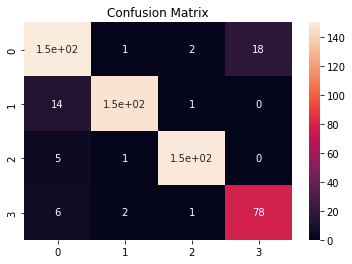

In [ ]:
cf_matrix = confusion_matrix(output_test, output_prediction)
print(cf_matrix)
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix") 
plt.show()

This section defines two functions: image_edit_predict and prediction. The first function takes "image_name" as its parameter, and it modifes the image such that it is coherent with the model. Later, the function asks the model to make a prediction. The model returns an array. Then, np.argmax is use to obtain the index of the highest value in that array. The index value is passed as a parameter to the second function that uses if-else statements to determine the type of tumor. The output is given in red if a tumor is present while the output is in green if there is no tumor.

In [ ]:
tumor_detection = ['Meningioma Tumor Detected','Gliomia Tumor Detected','Pituatory Tumor Detected','No Tumor Detected']
def image_edit_predict(image_name):
  predict_image = cv2.imread(image_name)
  tumor_image = cv2.resize(predict_image, (255, 255))
  plt.imshow(tumor_image)
  tumor_image = tumor_image.reshape(1, 255, 255, 3)
  output = ml_model.predict(tumor_image) 
  print(output)
  final_output = np.argmax(output, axis = 1)
  print(final_output)
  prediction(final_output)
def prediction(value):
  detection = np.array(tumor_detection)
  if value == 0:
    print("\n" + Fore.RED + str(detection[value])) 
    print("Classification (Corresponding Label value): " + str(one_hot_encoder.inverse_transform([[1,0,0,0]])))
  elif value == 1: 
     print("\n" + Fore.RED + str(detection[value]))
     print("Classification (Corresponding Label value): " + str(one_hot_encoder.inverse_transform([[0,1,0,0]])))
  elif value == 2:
    print("\n" + Fore.RED + str(detection[value]))
    print("Classification (Corresponding Label value):" + str(one_hot_encoder.inverse_transform([[0,0,1,0]])))
  elif value == 3:
    print("\n" + Fore.GREEN + str(detection[value]))
    print("Classification (Corresponding Label value): " + str(one_hot_encoder.inverse_transform([[0,0,0,1]])))




The function is called, and the prediction is given.

[[7.9578209e-01 1.6157774e-04 1.7873909e-03 2.0226906e-01]]
[0]

['Meningioma Tumor Detected']
Classification (Corresponding Label value): [[0]]


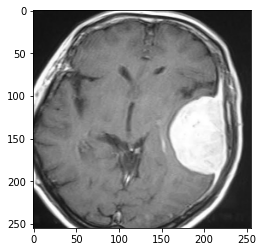

In [ ]:
image_edit_predict("men1.jpg")

[[0.96735626 0.00141302 0.0018617  0.029369  ]]
[0]

['Meningioma Tumor Detected']
Classification (Corresponding Label value): [[0]]


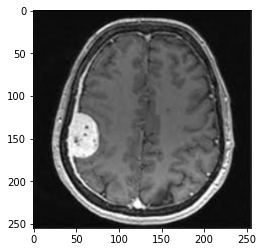

In [ ]:
image_edit_predict("men2.jpg")

[[1.0011360e-03 1.4594372e-04 9.8652577e-01 1.2327150e-02]]
[2]

['Pituatory Tumor Detected']
Classification (Corresponding Label value):[[2]]


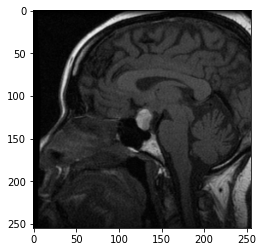

In [ ]:
image_edit_predict("pit1.jpg")

[[4.9277834e-05 3.5843070e-05 9.9987721e-01 3.7646991e-05]]
[2]

['Pituatory Tumor Detected']
Classification (Corresponding Label value):[[2]]


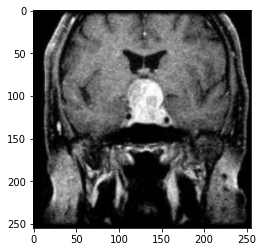

In [ ]:
image_edit_predict("pit2.jpg")

[[2.4959210e-02 5.8182296e-03 3.7680971e-04 9.6884578e-01]]
[3]

['No Tumor Detected']
Classification (Corresponding Label value): [[3]]


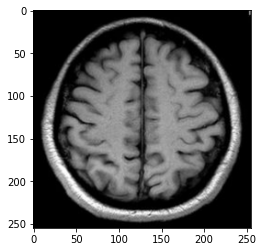

In [ ]:
image_edit_predict("no1.jpg")

[[1.1021978e-02 2.4171501e-04 1.6607079e-04 9.8857027e-01]]
[3]

['No Tumor Detected']
Classification (Corresponding Label value): [[3]]


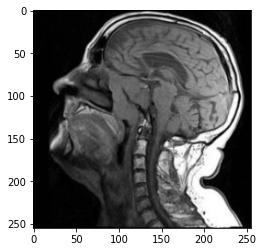

In [ ]:
image_edit_predict("no2.jpg")

[[4.3631297e-02 9.5628220e-01 7.0198580e-06 7.9484184e-05]]
[1]

['Gliomia Tumor Detected']
Classification (Corresponding Label value): [[1]]


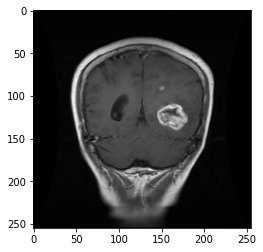

In [ ]:
image_edit_predict("gli.jpg")